#Desafio 5

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:

R (Recency): Tempo que o cliente realizou a última compra (em dias)

F (Frequency): Quantidade de compras realizadas pelo cliente

M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.

Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um
código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.

In [173]:
#Instalando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##ETAPA 01) Lendo o arquivo e inspecionando os dados

###1. Lendo o dataset

In [174]:
#Lendo a base de dados

df = pd.read_csv('/content/data.csv',encoding= 'unicode_escape')

# Exibindo a base de dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


###2. Utilizando o describe para verificar a distribuição dos dados

In [175]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


###3. Analisando o tipo dos dados

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## ETAPA 02) Valores faltantes na identificação do cliente

###1. Verificando os valores nulos com o isna e utilizando a função sum para a somar a quantidade de nulos

In [177]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Temos uma quantidade grande de NA. Vamos removê-los

###2. Utilizando a função dropna para remover os nulos

In [178]:
df.dropna(inplace = True)

df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##ETAPA 03) Preços unitários e quantidade de produtos iguais ou inferior a 0

###1. Realizand um filtro para verificar se existem dados nulos ou menor que zero na coluna de preços

In [179]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


Sim, podemos verificar que possuem valores nulos e menores que zero. Vamos removê-los

###2. Filtrand o dataset apenas para conter preços acima de zero

In [180]:
df = df[df['UnitPrice'] > 0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


###3. Realizando um filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade

In [181]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Sim, podemos verificar que possuem valores nulos e menores que zero. Vamos removê-los

###4. Filtrando o dataset apenas para conter quantidade acima de zero

In [182]:
df = df[df['Quantity'] > 0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##ETAPA 04) Verifique se existem linhas duplicadas

###1. Verificando se tem linhas duplicadas com a função duplicated

In [183]:
df.duplicated().sum()

5192

O dataframe possui 5192 linhas duplicadas, vamos excluir

###2. Dropando as linhas duplicadas

In [184]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

##ETAPA 05) Tipos de dados da coluna

Vamos verificar o tipo de dado das colunas

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


###1. Corrijindo o tipo de dado do CustomerID

In [186]:
df['CustomerID'] = df['CustomerID'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  int64  
 7   Country      392692 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.0+ MB


###2. Corrijindo o tipo de dado da InvoiceDate

In [187]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


##ETAPA 06) Tratando os outliers

Vamos visualizar os outliers

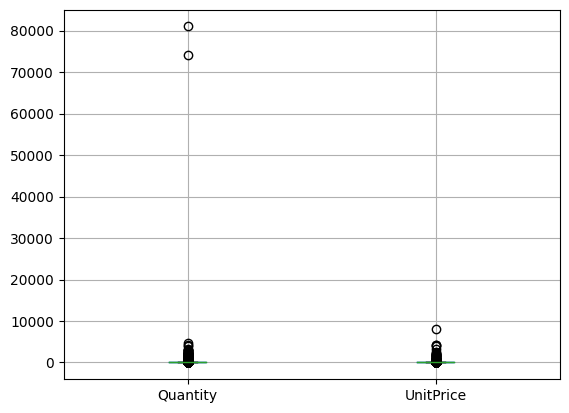

In [188]:
df.boxplot(column = ['Quantity', 'UnitPrice'])
plt.show()

Vamos remover os valores de Quantity maiores que 10.000

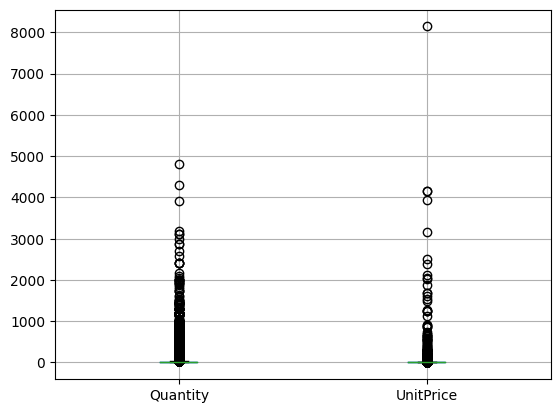

In [189]:
df.drop(df[df['Quantity'] > 10000].index, inplace=True)

df.boxplot(column = ['Quantity', 'UnitPrice'])
plt.show()

Vamos excluir os valores de UnitPrice acima de 5.000

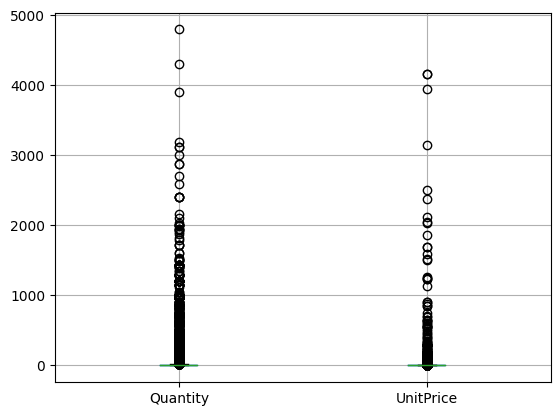

In [190]:
df.drop(df[df['UnitPrice'] > 5000].index, inplace=True)

df.boxplot(column = ['Quantity', 'UnitPrice'])
plt.show()

##ETAPA 07) Crie uma coluna adicional

Vamos criar uma nova coluna que vai exibir o preço total da compra

In [191]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


##ETAPA 08) Última data

Vamos armazenar a data da última compra

In [192]:
ultima_compra = df['InvoiceDate'].max()

ultima_compra

Timestamp('2011-12-09 12:50:00')

##ETAPA 09) Plotando gráficos

Vamos agora plotar algumas informações

- Top 10 países com maior valor em vendas

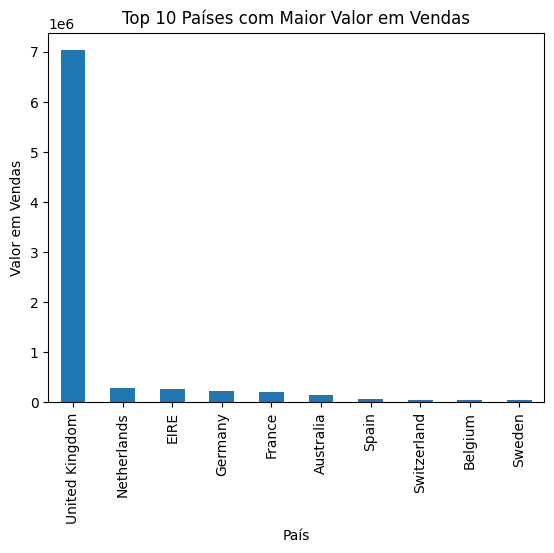

In [193]:
top_countries = df.groupby('Country')['TotalSales'].sum().nlargest(10)
top_countries.plot(kind='bar', title='Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor em Vendas')
plt.show()

- Top 10 produtos mais vendidos:

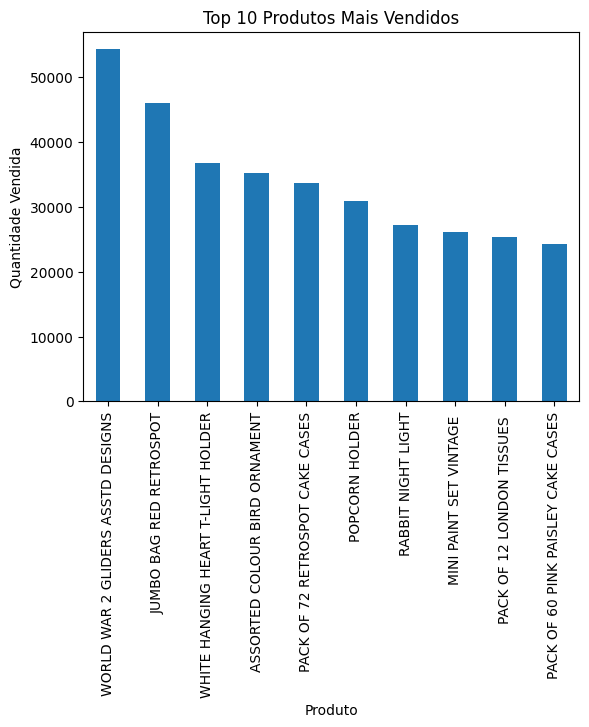

In [194]:
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

- Valor de venda total por mês:

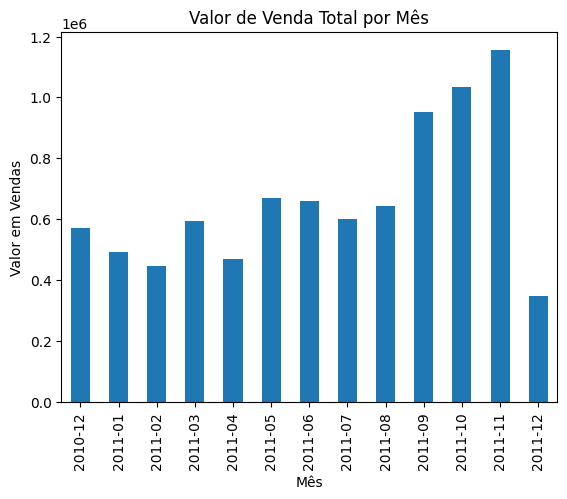

In [195]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
total_sales_per_month = df.groupby('Month')['TotalSales'].sum()
total_sales_per_month.plot(kind='bar', title='Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor em Vendas')
plt.show()

- Valor de venda total por mês e por país (considerando apenas os top 10):

<Figure size 2000x3000 with 0 Axes>

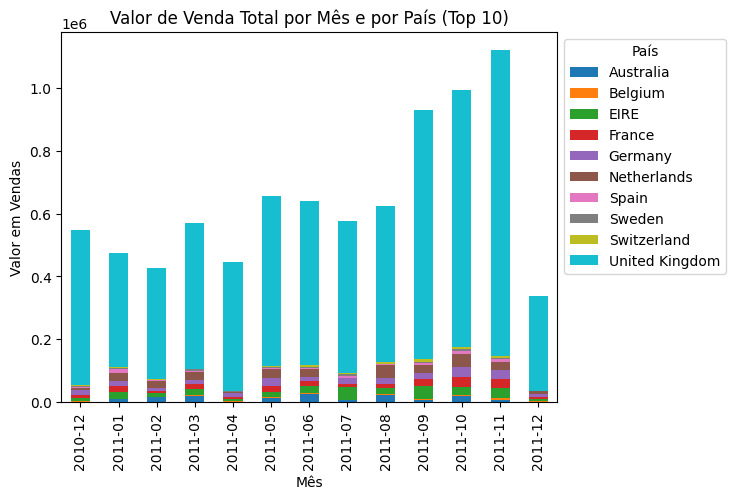

In [196]:
top_countries = df.groupby('Country')['TotalSales'].sum().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(20, 30))

total_sales_per_month_country = df_top_countries.groupby(['Month', 'Country'])['TotalSales'].sum().unstack()
total_sales_per_month_country.plot(kind='bar', stacked=True, title='Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor em Vendas')
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

##ETAPA 10) Cálculo do RFM

Vamos agora agrupar os dados por cliente e pedido/compra para obter a data e o preço total do pedido

In [197]:
Customer_df = df.groupby(['InvoiceNo', 'CustomerID']).agg({'InvoiceDate': 'max', 'TotalSales': 'sum', 'Quantity': 'count'})

Customer_df.head()

,,InvoiceDate,TotalSales,Quantity
InvoiceNo,CustomerID,,,
536365,17850,2010-12-01 08:26:00,139.12,7
536366,17850,2010-12-01 08:28:00,22.20,2
536367,13047,2010-12-01 08:34:00,278.73,12
536368,13047,2010-12-01 08:34:00,70.05,4
536369,13047,2010-12-01 08:35:00,17.85,1


Vamos fazer agora o cálculo do RFM

- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [198]:
#Diferença em dias da última compra do dataset com a última compra do cliente
Customer_df['R'] = (ultima_compra - Customer_df['InvoiceDate']).dt.days

#Mudando a contagem de quantity para F
Customer_df = Customer_df.rename(columns={'Quantity': 'F'})

#Criando uma tabela agrupada de CustomerID com a média de TotalSales
M_client = Customer_df.groupby('CustomerID')['TotalSales'].mean().reset_index()

#Pegando apenas as colunas CustomerID e M
M_client.columns = ['CustomerID', 'M']

#Juntando as duas tabelas
Customer_df = pd.merge(Customer_df, M_client, on='CustomerID')

#Obterndo apenas os dados que precisamos: CustomerID, R, F e M
RFM = Customer_df[['CustomerID', 'R', 'F', 'M']].copy()

#Exibindo a tabela
RFM

,CustomerID,R,F,M
0,17850,373,7,158.565
1,17850,373,2,158.565
2,17850,373,2,158.565
3,17850,373,16,158.565
4,17850,373,16,158.565
...,...,...,...,...
18524,13436,1,12,196.890
18525,15520,1,18,343.500
18526,13298,0,2,360.000
18527,14569,0,12,227.390


CustomerID ainda não está totalmente agrupado devido ao agrupamento anterior com o InvoiceNO, agora iremos agrupar todos os IDs do Customer

In [199]:
RFG_group = RFM.groupby('CustomerID').agg({'R': 'mean', 'F': 'sum', 'M': 'mean'})

RFG_group

,R,F,M
CustomerID,,,
12347,182.714286,182,615.714286
12348,249.250000,31,449.310000
12349,18.000000,73,1757.550000
12350,309.000000,17,334.400000
12352,196.500000,85,313.255000
...,...,...,...
18280,277.000000,10,180.600000
18281,180.000000,7,80.820000
18282,66.000000,12,89.025000


Por fim, temos nossa tabela RFM